In [1]:
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder.appName("linearRegression").getOrCreate()

In [3]:
from pyspark.ml.regression import LinearRegression

In [4]:
data = spark.read.csv('data_BCA.csv',inferSchema =True, header=True)

In [5]:
data.printSchema()

root
 |-- Harga: integer (nullable = true)
 |-- Tertinggi: integer (nullable = true)
 |-- Terendah: integer (nullable = true)
 |-- Penutupan: integer (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- Nilai: long (nullable = true)
 |-- Frekuensi: integer (nullable = true)



In [6]:
data.show()

+-----+---------+--------+---------+---------+-------------+---------+
|Harga|Tertinggi|Terendah|Penutupan|   Volume|        Nilai|Frekuensi|
+-----+---------+--------+---------+---------+-------------+---------+
| 9500|     9600|    9475|     9575| 85290100| 815474150000|    16850|
| 9400|     9475|    9375|     9475| 77288400| 730505102500|    18289|
| 9425|     9425|    9325|     9350| 34603300| 324210795000|    10016|
| 9400|     9425|    9350|     9425| 30545200| 287338455000|    10764|
| 9425|     9450|    9350|     9400| 79903400| 751898350000|    10689|
| 9325|     9425|    9325|     9400| 70184600| 658943665000|    12600|
| 9375|     9400|    9325|     9375| 72256600| 677203315000|    18093|
| 9275|     9350|    9275|     9325| 64449600| 600423380000|    10116|
| 9300|     9325|    9250|     9325| 88116700| 819722295000|    12694|
| 9250|     9300|    9225|     9300| 72938100| 677012335000|    14437|
| 9125|     9250|    9125|     9250| 87544300| 805286270000|    14148|
| 9200

In [7]:
data.head(1)[0]

Row(Harga=9500, Tertinggi=9600, Terendah=9475, Penutupan=9575, Volume=85290100, Nilai=815474150000, Frekuensi=16850)

In [8]:
for item in data.head(1)[0]:
    print(item)

9500
9600
9475
9575
85290100
815474150000
16850


In [9]:
from pyspark.ml.linalg import Vectors

In [10]:
from pyspark.ml.feature import VectorAssembler

In [11]:
data.columns

['Harga', 'Tertinggi', 'Terendah', 'Penutupan', 'Volume', 'Nilai', 'Frekuensi']

In [14]:
assembler = VectorAssembler(inputCols=['Harga', 'Tertinggi', 'Terendah', 'Penutupan', 'Volume', 'Nilai', 'Frekuensi'],outputCol= 'features')

In [15]:
output = assembler.transform(data)

In [16]:
output.head(1)

[Row(Harga=9500, Tertinggi=9600, Terendah=9475, Penutupan=9575, Volume=85290100, Nilai=815474150000, Frekuensi=16850, features=DenseVector([9500.0, 9600.0, 9475.0, 9575.0, 85290100.0, 815474150000.0, 16850.0]))]

In [17]:
final_data = output.select('features','penutupan')

In [18]:
final_data.show()

+--------------------+---------+
|            features|penutupan|
+--------------------+---------+
|[9500.0,9600.0,94...|     9575|
|[9400.0,9475.0,93...|     9475|
|[9425.0,9425.0,93...|     9350|
|[9400.0,9425.0,93...|     9425|
|[9425.0,9450.0,93...|     9400|
|[9325.0,9425.0,93...|     9400|
|[9375.0,9400.0,93...|     9375|
|[9275.0,9350.0,92...|     9325|
|[9300.0,9325.0,92...|     9325|
|[9250.0,9300.0,92...|     9300|
|[9125.0,9250.0,91...|     9250|
|[9200.0,9225.0,91...|     9200|
|[9125.0,9225.0,90...|     9225|
|[8775.0,9050.0,87...|     9050|
|[8700.0,8750.0,86...|     8675|
|[8700.0,8750.0,87...|     8700|
|[8675.0,8775.0,86...|     8750|
|[8800.0,8850.0,87...|     8750|
|[8750.0,8825.0,87...|     8825|
|[8850.0,8950.0,88...|     8800|
+--------------------+---------+
only showing top 20 rows



In [20]:
train_data, test_data = final_data.randomSplit([0.7,0.3])

In [21]:
train_data.describe().show()

+-------+------------------+
|summary|         penutupan|
+-------+------------------+
|  count|               657|
|   mean| 18636.87214611872|
| stddev|11547.329609421759|
|    min|              7000|
|    max|             36450|
+-------+------------------+



In [22]:
lr = LinearRegression(labelCol="penutupan")

In [23]:
lr_model = lr.fit(train_data)

In [39]:
test_results = lr_model.evaluate(test_data)

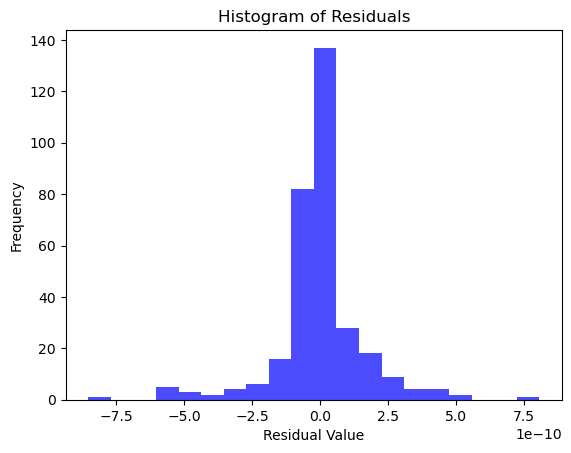

In [43]:
# Plot histogram residual
residuals = test_results.residuals.toPandas()["residuals"]

# Buat histogram residual
plt.hist(residuals, bins=20, color='blue', alpha=0.7)
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()



NameError: name 'y' is not defined

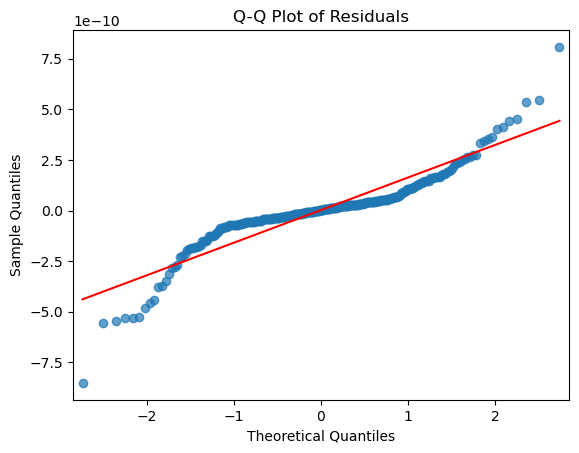

In [45]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Q-Q plot for residuals
sm.qqplot(residuals, line='s', alpha=0.7)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [25]:
test_results.residuals.show()

+--------------------+
|           residuals|
+--------------------+
|5.456968210637569...|
|8.076312951743603...|
|-1.23691279441118...|
|-6.91215973347425...|
|4.401954356580972...|
|1.127773430198431...|
|-1.81898940354585...|
|-4.40195435658097...|
|-2.76486389338970...|
|-5.45696821063756...|
|2.000888343900442...|
|3.528839442878961...|
|1.455191522836685...|
|-2.29192664846777...|
|7.275957614183426...|
|5.093170329928398...|
|2.655724529176950...|
|1.382431946694851...|
|3.456079866737127...|
|2.619344741106033...|
+--------------------+
only showing top 20 rows



In [26]:
test_results.rootMeanSquaredError

1.6096535378142596e-10

In [27]:
test_results.r2

1.0

In [28]:
final_data.describe().show()

+-------+-----------------+
|summary|        penutupan|
+-------+-----------------+
|  count|              979|
|   mean|18486.87436159346|
| stddev|11517.48987150549|
|    min|             7000|
|    max|            36725|
+-------+-----------------+



In [29]:
unlabeled_data = test_data.select('features')

In [30]:
unlabeled_data.show()

+--------------------+
|            features|
+--------------------+
|[0.0,24800.0,2340...|
|[0.0,24975.0,2225...|
|[0.0,25000.0,2427...|
|[0.0,25100.0,2427...|
|[0.0,25700.0,2460...|
|[0.0,25850.0,2542...|
|[0.0,26175.0,2522...|
|[0.0,26250.0,2440...|
|[0.0,26500.0,2500...|
|[0.0,26600.0,2500...|
|[0.0,26900.0,2382...|
|[0.0,26925.0,2162...|
|[0.0,27000.0,2575...|
|[0.0,27225.0,2640...|
|[0.0,27350.0,2680...|
|[0.0,27500.0,2620...|
|[0.0,27500.0,2665...|
|[0.0,28250.0,2772...|
|[0.0,28700.0,2792...|
|[0.0,28800.0,2820...|
+--------------------+
only showing top 20 rows



In [31]:
predictions = lr_model.transform(unlabeled_data)

In [32]:
predictions.show()

+--------------------+------------------+
|            features|        prediction|
+--------------------+------------------+
|[0.0,24800.0,2340...|23399.999999999454|
|[0.0,24975.0,2225...|22499.999999999192|
|[0.0,25000.0,2427...|24825.000000000124|
|[0.0,25100.0,2427...| 24800.00000000007|
|[0.0,25700.0,2460...| 24599.99999999956|
|[0.0,25850.0,2542...|25549.999999999887|
|[0.0,26175.0,2522...| 25725.00000000002|
|[0.0,26250.0,2440...| 25850.00000000044|
|[0.0,26500.0,2500...|26100.000000000276|
|[0.0,26600.0,2500...|26475.000000000546|
|[0.0,26900.0,2382...|  24999.9999999998|
|[0.0,26925.0,2162...|23674.999999999647|
|[0.0,27000.0,2575...|26224.999999999854|
|[0.0,27225.0,2640...| 27125.00000000023|
|[0.0,27350.0,2680...|27049.999999999927|
|[0.0,27500.0,2620...| 26799.99999999995|
|[0.0,27500.0,2665...|26774.999999999734|
|[0.0,28250.0,2772...| 27874.99999999986|
|[0.0,28700.0,2792...|27924.999999999654|
|[0.0,28800.0,2820...|28224.999999999738|
+--------------------+------------